### Try it 10.1: Decomposing Time Series


<center>
    <img src = 'images/spots.png' /><img src = 'images/air.png' />
</center>


 

This activity fouses on exploring two different time series and the decomposed elements.  The example of sunspots data is given as well as a dataset containing air passenger information through the twentieth century in the United States.  These are both time series datasets however there is a distinct difference in the nature of the time series.  

Below, you are to use the statsmodels function `seasonal_decompose` to show how the trend and seasonality of the series differ in (perhaps) expected ways.  To begin, you are to make sure the datasets contain an appropriate time stamp index -- statsmodels expects this.  Then, use the `seasonal_decompose` function to decompose the series into trend and seasonality.  Examing plots of these elements, and discuss the similarities and differences between these components for the two time series.  

In [114]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import _extrapolate_trend

import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Sun Activity

In [117]:
sunspots = sm.datasets.sunspots.load_pandas()

In [119]:
sunspots_df = sunspots.data
sunspots_df.head(2)

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0


In [121]:
sunspots_df['YEAR'] = pd.to_datetime(sunspots_df['YEAR'], format='%Y')
sunspots_df.set_index('YEAR', inplace=True)
sunspots_df.tail(5)

,SUNACTIVITY
YEAR,
2004-01-01,40.4
2005-01-01,29.8
2006-01-01,15.2
2007-01-01,7.5
2008-01-01,2.9


Data exihibits 28 peaks from the beginning of 1700 through 2008 (309 years) implying a period of roughly 11 years.

In [124]:
period = 11
decomposition = seasonal_decompose(sunspots_df['SUNACTIVITY'], model='additive', period=period)

# Extract the trend and seasonality components
trend = decomposition.trend
trend = _extrapolate_trend(trend, period+1)

seasonality = decomposition.seasonal

print(trend)
print(seasonality)

YEAR
1700-01-01    12.433884
1701-01-01    13.119835
1702-01-01    13.805785
1703-01-01    14.491736
1704-01-01    15.177686
                ...    
2004-01-01    56.039426
2005-01-01    54.510945
2006-01-01    52.982465
2007-01-01    51.453984
2008-01-01    49.925503
Name: trend, Length: 309, dtype: float64
YEAR
1700-01-01   -27.227096
1701-01-01   -26.747634
1702-01-01   -19.075580
1703-01-01     0.105901
1704-01-01    18.352029
                ...    
2004-01-01    16.458426
2005-01-01     2.327787
2006-01-01    -9.171540
2007-01-01   -20.872213
2008-01-01   -27.227096
Name: seasonal, Length: 309, dtype: float64


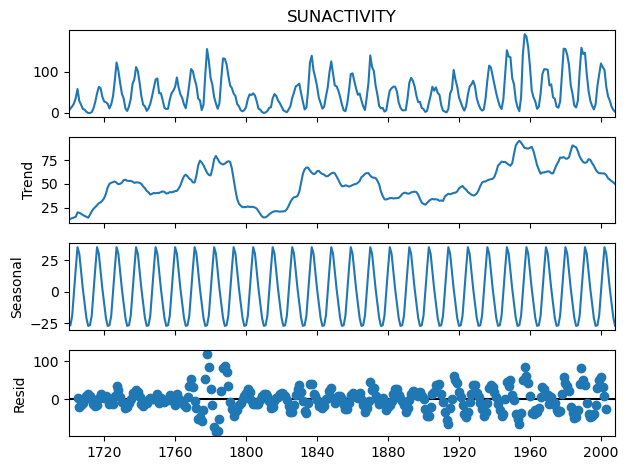

In [126]:
#Plot the results
decomposition.plot()
plt.show()

### Air Travel

In [129]:
air = pd.read_csv('data/AirPassengers.csv')
air.head(5)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [131]:
air['Month'] = pd.to_datetime(air['Month'], format='%Y-%m')
air.set_index('Month', inplace=True)
print(air.head(5))
print(air.tail(5))

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
            #Passengers
Month                  
1960-08-01          606
1960-09-01          508
1960-10-01          461
1960-11-01          390
1960-12-01          432


Data exihibits 12 peaks from the beginning of 1949 through 1960 (144 months) implying a period of roughly 12 months.

In [135]:
period = 12
decomposition = seasonal_decompose(air['#Passengers'], model='multiplicative', period=period)

# Extract the trend and seasonality components
trend = decomposition.trend
trend = _extrapolate_trend(trend, period+1)

seasonality = decomposition.seasonal

print(trend)
print(seasonality)

Month
1949-01-01    118.044872
1949-02-01    119.246795
1949-03-01    120.448718
1949-04-01    121.650641
1949-05-01    122.852564
                 ...    
1960-08-01    486.452839
1960-09-01    490.828297
1960-10-01    495.203755
1960-11-01    499.579212
1960-12-01    503.954670
Name: trend, Length: 144, dtype: float64
Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
                ...   
1960-08-01    1.219911
1960-09-01    1.060492
1960-10-01    0.921757
1960-11-01    0.801178
1960-12-01    0.898824
Name: seasonal, Length: 144, dtype: float64


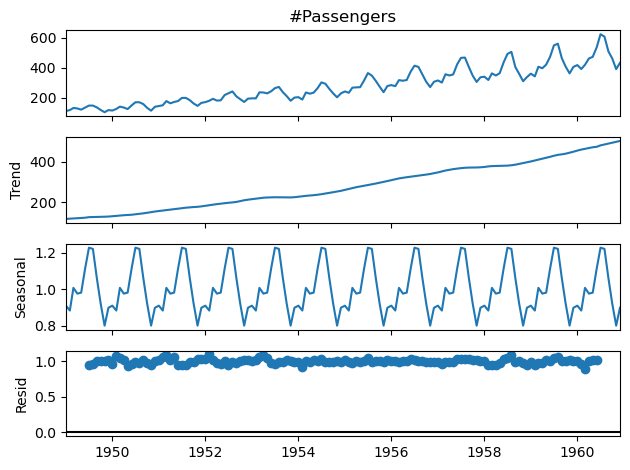

In [137]:
#Plot the results
decomposition.plot()
plt.show()